<a href="https://colab.research.google.com/github/AlvarezLI/Python_MushroomsDS/blob/main/Procedure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis - Final Project**

**1. Introduction**

In this notebook, we will conduct an exploratory data analysis using a mushroom dataset for the final project. The main goal is to explore the relationships between various variables and predict the target variable (edibility) using machine learning techniques.

**1.1 Dataset Context**

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms from the Agaricus and Lepiota families, extracted from the *Audubon Society Field Guide to North American Mushrooms* (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown and not recommended edibility. The latter class was combined with the poisonous class.

Dataset link: [Mushroom Classification Dataset](https://www.kaggle.com/datasets/uciml/mushroom-classification)

**1.2 Objective**

The goal of this project is to identify different types of mushrooms and predict their edibility based on their physical and chemical characteristics. This analysis will help understand the distinguishing features between edible and poisonous mushrooms, contributing to food safety and safe mushroom gathering.

**1.3 Analytical Context**

The analyzed dataset consists of 8124 records and 23 columns. The target variable is the column labeled "class", which accepts the values "e" (edible) or "p" (poisonous). The variables in the dataset can be grouped into several categories, mainly based on the physical and environmental characteristics of the mushrooms.

This analysis is relevant from both a scientific and practical perspective. In the field of mycology, accurate identification of poisonous mushrooms is crucial for public safety and the food industry. Additionally, this type of analysis can be useful for educational applications and the creation of mobile apps to help mushroom gatherers identify potentially dangerous species in the field.

The variables in the dataset include:

- **Cap characteristics**: cap-shape, cap-surface, cap-color.
- **Gill characteristics**: gill-attachment, gill-spacing, gill-size, gill-color.
- **Stalk characteristics**: stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, stalk-color-above-ring, stalk-color-below-ring.
- **Veil characteristics**: veil-type, veil-color.
- **Ring**: ring-number, ring-type.
- **Spore characteristics**: spore-print-color.
- **Habitat and others**: habitat, population, odor, bruises.

These are mostly categorical, requiring specific preprocessing techniques to be used in machine learning models.

**1.4 Commercial Context**

From a commercial standpoint, having a reliable prediction model can be beneficial for companies that sell mushroom identification kits or develop species recognition apps. The ability to accurately identify poisonous and edible mushrooms can enhance consumer safety and increase trust in the products or services offered.

**1.5 Hypotheses and Guiding Questions**

- Is there any relationship between the cap color of mushrooms and their edibility?
- How does the distribution of edible and poisonous mushrooms vary across different habitats?
- Is there any association between the odor of mushrooms and their toxicity?



**2. Exploración y preparación de Datos**

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc



In [16]:
df = pd.read_csv('mushrooms_modified.csv')

# Checking for missing values in the dataset
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)


Missing values in each column:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


**EDA**

Studies by variables:

In this initial phase, we will take a general look at the percentage of poisonous and edible mushrooms within the dataset.

We will use the "class" variable, which distinguishes between **e** (edible) and **p** (poisonous).


In this second instance, we will make a comparison between poisonous mushrooms (blue) and edible mushrooms (orange) within the different cap shapes.

The shapes we have are knobbed, bell, convex, sunken, flat, and conical.


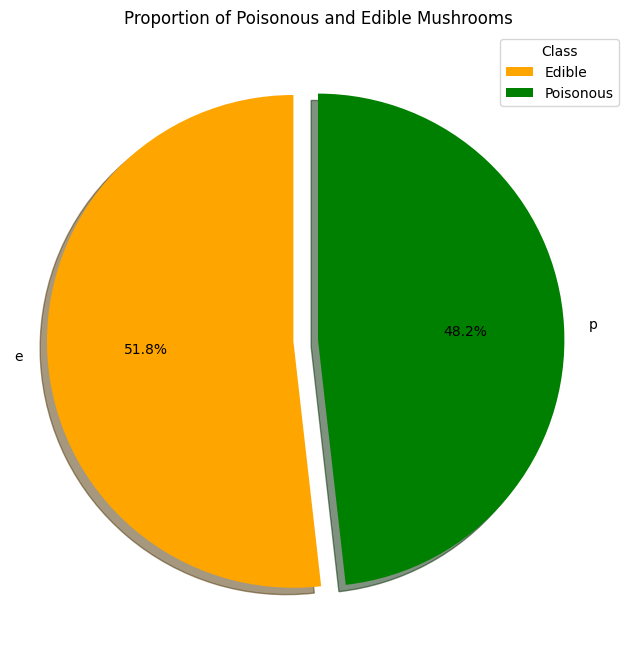

In [18]:

# Pie chart for proportion of poisonous and edible mushrooms with swapped colors
plt.figure(figsize=(8, 8))
df['class'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=[0.1, 0], shadow=True, colors=[color_edible, color_poisonous])
plt.title('Proportion of Poisonous and Edible Mushrooms')
plt.ylabel('')
plt.legend(title='Class', labels=['Edible', 'Poisonous'], loc='upper right')
plt.show()


In this second instance, we will compare the poisonous mushrooms (green) and edible mushrooms (orange) across different cap shapes.

The cap shapes include knobbed, bell, convex, sunken, flat, and conical.

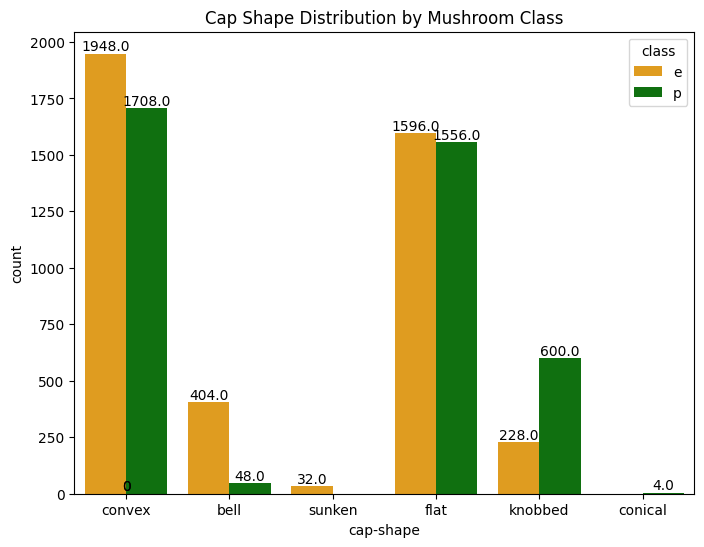

In [29]:
# Define the new colors with swapped values
color_edible = 'orange'
color_poisonous = 'green'

# Cap shape distribution by class with swapped colors
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='cap-shape', hue='class', palette=[color_edible, color_poisonous], hue_order=['e', 'p'])

# Add labels on the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Title of the plot
plt.title('Cap Shape Distribution by Mushroom Class')

# Display the plot
plt.show()



As a third relevant graph, we will indicate its edibility based on the cap color.

We will use the variable cap-color.

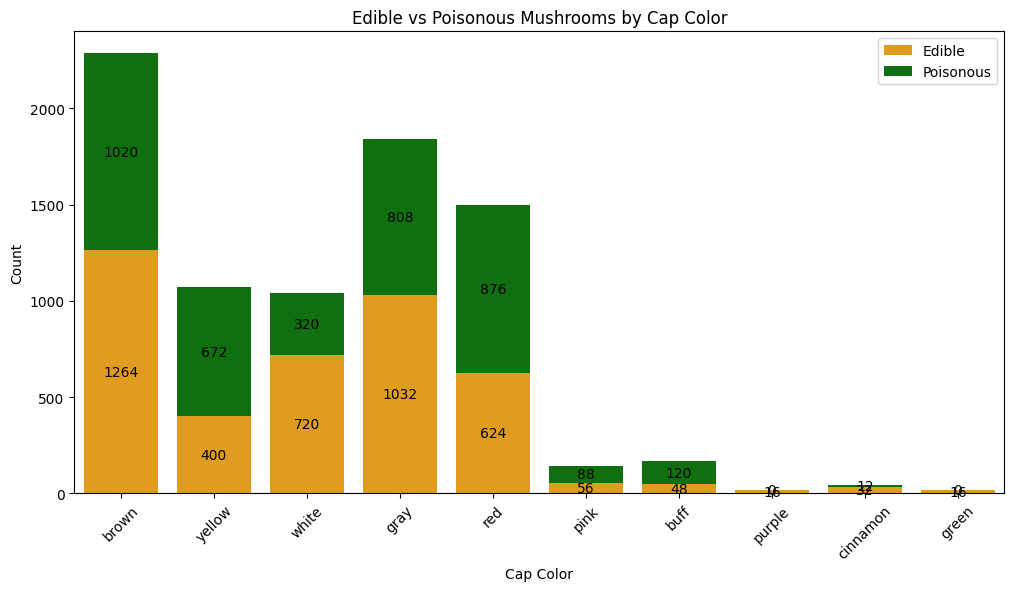

In [23]:
colors = df['cap-color'].unique()

edible_counts = [len(df[(df['cap-color'] == color) & (df['class'] == 'e')]) for color in colors]
poisonous_counts = [len(df[(df['cap-color'] == color) & (df['class'] == 'p')]) for color in colors]

plt.figure(figsize=(12, 6))

# Swapping colors: Orange for 'Poisonous' and Green for 'Edible'
sns.barplot(x=colors, y=edible_counts, color='orange', label='Edible')
sns.barplot(x=colors, y=poisonous_counts, bottom=edible_counts, color='green', label='Poisonous')

# Adding labels to the bars
for i, (edible, poisonous) in enumerate(zip(edible_counts, poisonous_counts)):
    plt.text(i, edible/2, edible, ha='center', va='center', color='black', fontsize=10)
    plt.text(i, edible + poisonous/2, poisonous, ha='center', va='center', color='black', fontsize=10)

plt.xlabel('Cap Color')
plt.ylabel('Count')
plt.title('Edible vs Poisonous Mushrooms by Cap Color')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In this case, we will create a pie chart indicating the percentage of edible and poisonous mushrooms by habitat.

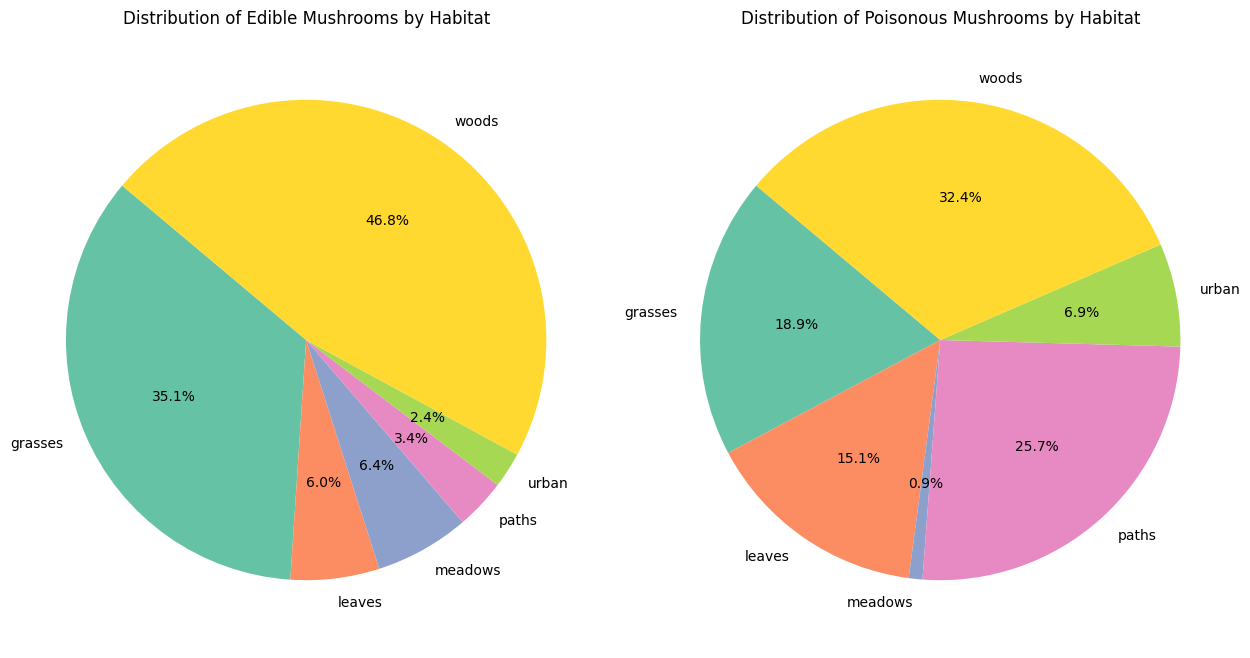

In [6]:
habitat_counts = df.groupby(['habitat', 'class']).size().unstack()

habitat_counts = habitat_counts.dropna()

edible_counts = habitat_counts.loc[:, 'e']
poisonous_counts = habitat_counts.loc[:, 'p']


fig, axs = plt.subplots(1, 2, figsize=(15, 8))

axs[0].pie(edible_counts, labels=edible_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494'])
axs[0].set_title('Distribution of Edible Mushrooms by Habitat')
axs[0].axis('equal')

axs[1].pie(poisonous_counts, labels=poisonous_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494'])
axs[1].set_title('Distribution of Poisonous Mushrooms by Habitat')
axs[1].axis('equal')

plt.show()


This chart is key in distinguishing mushrooms, classifying both by odor.

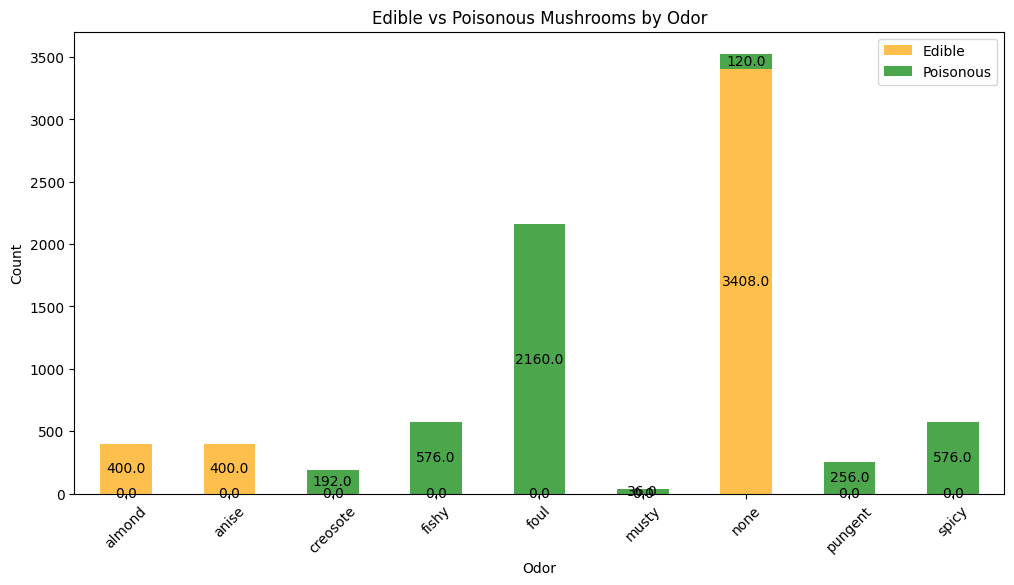

In [24]:
odor_counts = df.groupby(['odor', 'class']).size().unstack()

# Color swap: Orange for 'Edible' and Green for 'Poisonous'
ax = odor_counts.plot(kind='bar', stacked=True, color=['orange', 'green'], alpha=0.7, figsize=(12, 6))

# Adding labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='black')

plt.xlabel('Odor')
plt.ylabel('Count')
plt.title('Edible vs Poisonous Mushrooms by Odor')
plt.legend(['Edible', 'Poisonous'])
plt.xticks(rotation=45)
plt.show()


In this chart, we will review the distribution of mushrooms by ring type.

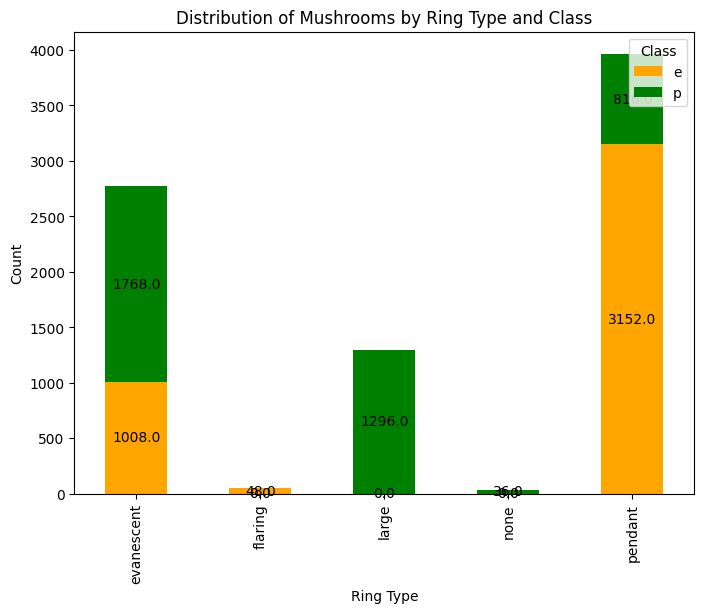

In [25]:
ring_type_counts = df.groupby(['ring-type', 'class']).size().unstack()

# Color swap: Orange for 'Edible' and Green for 'Poisonous'
ax = ring_type_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['orange', 'green'])

# Adding labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='black')

plt.title('Distribution of Mushrooms by Ring Type and Class')
plt.xlabel('Ring Type')
plt.ylabel('Count')
plt.legend(title='Class', loc='upper right')
plt.show()


We classify according to the stem shape.

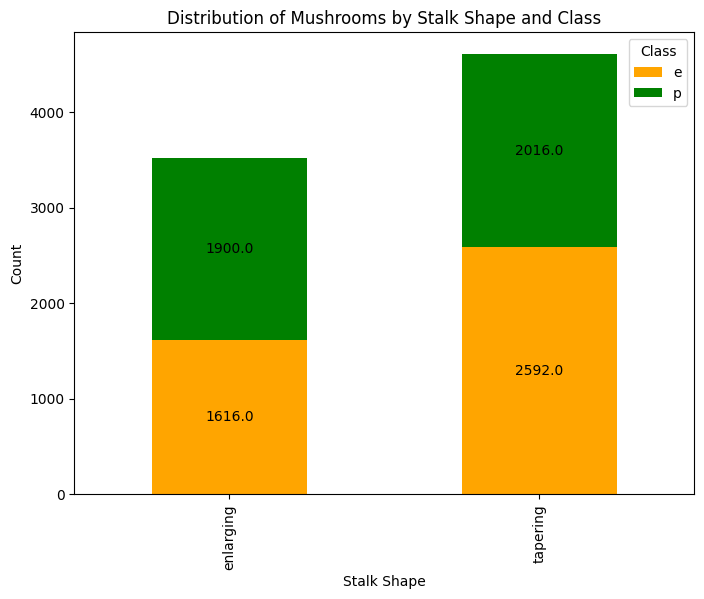

In [26]:
stalk_shape_counts = df.groupby(['stalk-shape', 'class']).size().unstack()

# Color swap: Orange for 'Edible' and Green for 'Poisonous'
ax = stalk_shape_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['orange', 'green'])

# Adding labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='black')

plt.title('Distribution of Mushrooms by Stalk Shape and Class')
plt.xlabel('Stalk Shape')
plt.ylabel('Count')
plt.legend(title='Class', loc='upper right')
plt.show()



Finally, we classify based on gill size.



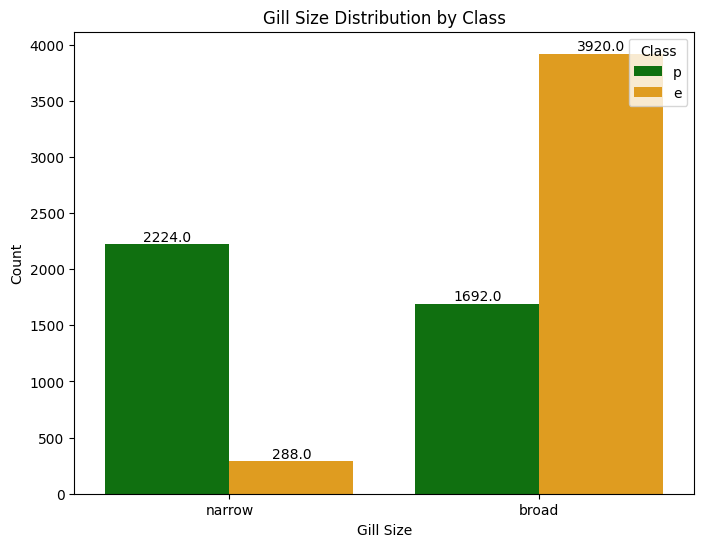

In [27]:
# Gill size count plot by class
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='gill-size', hue='class', data=df, palette={'e': 'orange', 'p': 'green'})

# Add value labels to the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Ensure the height is greater than zero before adding label
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Gill Size Distribution by Class')
plt.xlabel('Gill Size')
plt.ylabel('Count')
plt.legend(title='Class', loc='upper right')
plt.show()



**EDA Conclusions:**  

* Based on the results obtained from this initial exploration of the dataset, we were able to determine some of the most important characteristics when determining whether mushrooms are edible or poisonous. Among these, **odor, gill size, ring type, and color** stand out.  
* We also highlight the differences between edible and poisonous mushrooms in terms of the habitat where they grow, which is also an important factor when classifying them.  

**Recommendations:**  

* **Education and Awareness:** Promote education about safe mushroom identification among foragers and mycology enthusiasts, highlighting the key differences in physical and environmental characteristics between edible and poisonous mushrooms.  

* **Application Development:** Consider developing mobile applications that use machine learning algorithms to help with the quick and accurate identification of edible and poisonous mushrooms based on visual and environmental characteristics.  

* **Ongoing Research:** Continue researching and collecting data on new mushroom species to improve the accuracy of prediction models and ensure the constant updating of mycological databases.  

**Data Preparation:**  

After performing a detailed exploratory data analysis of the mushroom data, we are preparing to develop a predictive model using machine learning techniques. Since the mushroom dataset is primarily composed of categorical variables, we will focus on the following strategies:  

**Classification and Clustering Models: Random Forest**  

We will use Random Forest, an ensemble of decision trees, taking advantage of the most relevant features identified during exploratory analysis. This model will allow us to explore complex and non-linear relationships between mushroom characteristics and their edibility.
```

In the following code, we will prepare to train a Random Forest model and visualize how it classifies between edible and poisonous mushrooms.


Model accuracy: 1.00
Confusion Matrix:
[[843   0]
 [  0 782]]

Classification Report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



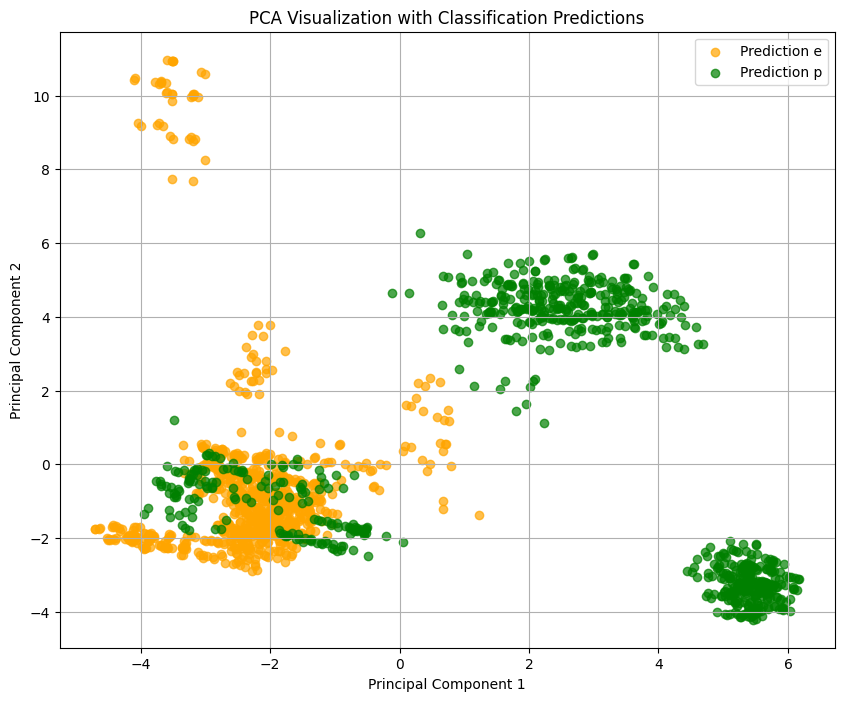

In [28]:
# Step 1: Define the variables.
X = df.drop('class', axis=1)
y = df['class']

# Then we split the data into training and testing, in this case, I used 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We apply One-Hot Encoding to the categorical variables in X_train and X_test.
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# We ensure that X_train_encoded and X_test_encoded have the same columns after encoding.
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

# Step 2: Train the Random Forest model.
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_encoded, y_train)

# Step 3: Evaluate the model.
y_pred = rf_model.predict(X_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy:.2f}')

# Evaluation metrics.
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Apply PCA for visualization.
# Normalize the data for PCA.
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test_encoded)

# Apply PCA to reduce to 2 principal components.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_scaled)

# Add prediction results to the PCA-reduced DataFrame.
df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Prediction'] = y_pred

# Plot the result.
# Plot the result with color changes.
plt.figure(figsize=(10, 8))
colors = {'e': 'orange', 'p': 'green'}

for cl, color in colors.items():
    subset = df_pca[df_pca['Prediction'] == cl]
    plt.scatter(subset['Principal Component 1'], subset['Principal Component 2'],
                label=f'Prediction {cl}', color=color, alpha=0.7)

plt.title('PCA Visualization with Classification Predictions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()



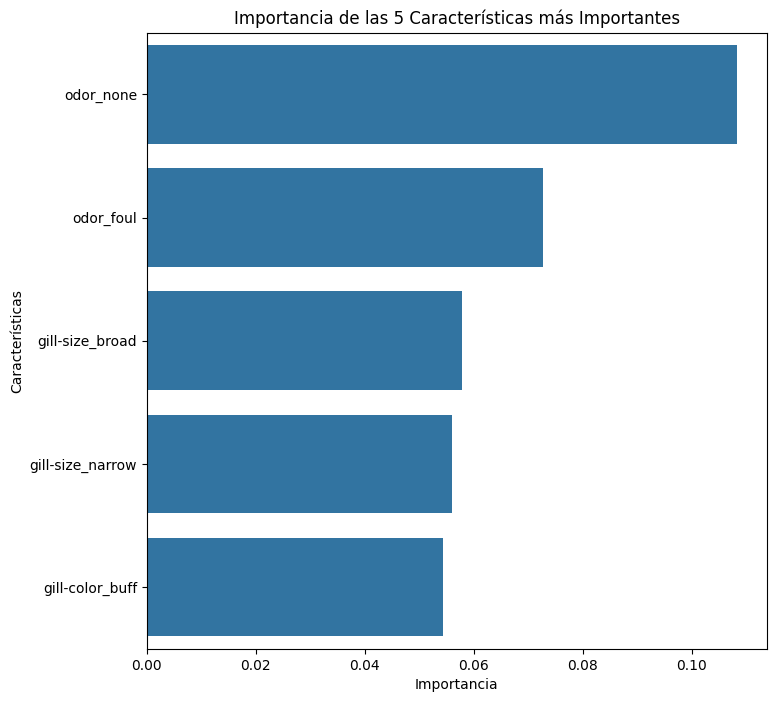

In [ ]:
# Enumerate the most determinant data for classification.
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train_encoded.columns)
feature_importances = feature_importances.sort_values(ascending=False).head(5)  # Get the top 5 most important

plt.figure(figsize=(8, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Importance of the 5 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()



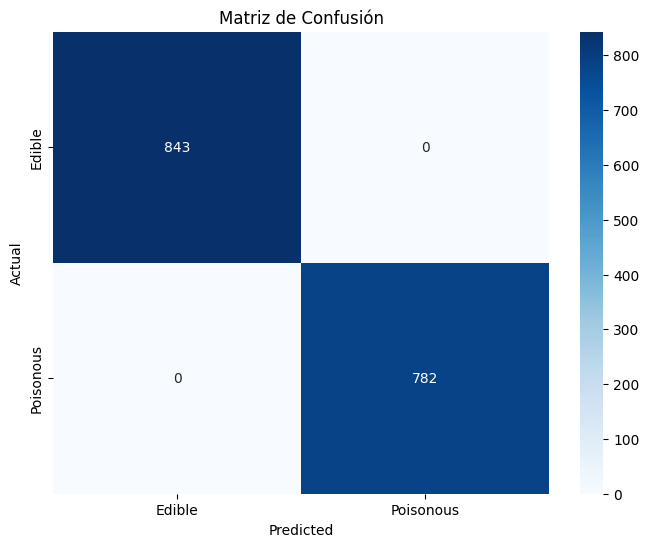

In [ ]:
# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



**Conclusion:**

During our mushroom analysis, we explored different machine learning techniques to better understand what makes mushrooms edible or poisonous. Below are the key takeaways and how we approached each:

**Pattern Discovery with Clustering:**

We used clustering techniques to uncover natural patterns in the physical and environmental features of mushrooms. This allowed us to group mushrooms into sets with similar characteristics, making it easier to classify and understand the diversity of species.

**Prediction with Logistic Regression:**

We implemented a logistic regression model to predict whether a specific mushroom would be edible ('e') or poisonous ('p'). We focused on key features such as cap color, odor, and habitat to improve the model’s accuracy in these fundamental predictions.

**Optimization through Feature Engineering:**

During the feature engineering phase, we ensured that we selected the most relevant variables influencing the edibility of mushrooms. We used techniques like One-Hot Encoding to handle categorical variables and normalized the data to ensure all features were comparable, thus improving the performance of our predictive models.

To conclude, I would like to highlight that this dataset provided a solid, clean, and organized foundation, which was crucial for facilitating our exploration and analysis.



